# Thera Bank Personal Loan Campaign

## Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Domain:

Banking

## Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Attribute Information

__ID__: Customer ID

__Age__: Customer's age in completed years

__Experience__: #years of professional experience

__Income__: Annual income of the customer

__ZIP Code__: Home Address ZIP code

__Family__: Family size of the customer

__CCAvg__: Avg. spending on credit cards per month 

__Education__: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

__Mortgage__: Value of house mortgage if any.

__Personal Loan__: Did this customer accept the personal loan offered in the last campaign?

__Securities Account__: Does the customer have a securities account with the bank?

__CD Account__: Does the customer have a certificate of deposit (CD) account with the bank?

__Online__: Does the customer use internet banking facilities?

__Credit card__: Does the customer use a credit card issued by the bank?

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries for the data

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

In [3]:
# Bank Personal Loan Campaign Data

loan_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
# confirming conversion of the csv file into a Pandas DataFrame

type(loan_data)

pandas.core.frame.DataFrame

In [5]:
loan_data.shape

(5000, 14)

In [6]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
# Providing information on each column listed in the data and their datatypes

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# remove ID column
# We will look at why ZIP code column is not immediately removed

loan_data = loan_data.drop('ID', axis=1)

In [9]:
# Providing statistical summary

loan_data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### We can already note a few skewed columns and most ZIP codes starting with the digit 9 

In [10]:
loan_data['Experience'].nunique()

47

In [11]:
loan_data['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

__We can already observe from the above data that there are some incorrect imputations such as in the experience.__ 

__The minimum value provided for experience is -3 years which does not make sense__

__The Zip Code is not entirely convincing as well with 4 and 5 digit codes but we can assume the 4 digit codes to have a leading 0__ 

In [12]:
# Check on shape of Dataset

loan_data.shape

(5000, 13)

In [13]:
# Check on any null values in data set

loan_data.isnull().values.any()

False

### Lets check if the data is consistent with the stats 

In [14]:
# Check for percentage conversion of liabilty customers to Personal Loan

accepted = len(loan_data.loc[loan_data['Personal Loan'] == True])
not_accepted = len(loan_data.loc[loan_data['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(accepted, (accepted / (accepted + not_accepted)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(not_accepted, (not_accepted / (accepted + not_accepted)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


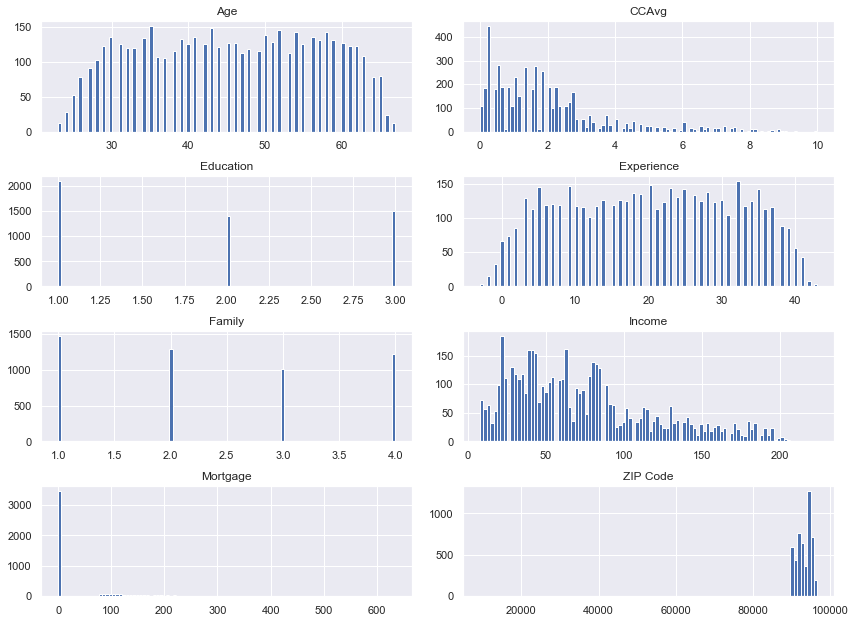

In [15]:
# Histogram of first 8 columns excluding ID

columns = list(loan_data)[0:8] # Excluding all columns with Binary output including the output column of Personal Loan
loan_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

plt.tight_layout()

__Credit Card Average, Mortgage and Income dont seem to have a consistent spread__

__These could be compared to the percentage of people who bought a Personal Loan__

## Incorrect imputation

__As noted earlier, experience column seems to have negative values and these need to be accounted for__

In [16]:
# We observe the experience has been distributed fairly consistently
# Hence we take the mean experience from all values that are not less than 0

loan_data[loan_data['Experience'] >= 0]['Experience'].mean()

20.33104284559418

In [17]:
# We observe in our dataset that experience takes 3 negative values of -1, -2 and -3
# Here we impute the negative values with mean value of experience calculated above

from sklearn.impute import SimpleImputer
rep_1 = SimpleImputer(missing_values= -1, strategy="constant", fill_value=20.33)
rep_2 = SimpleImputer(missing_values= -2, strategy="constant", fill_value=20.33)
rep_3 = SimpleImputer(missing_values= -3, strategy="constant", fill_value=20.33)
cols=['Experience']
imputer_1 = rep_1.fit(loan_data[cols])
imputer_2 = rep_2.fit(loan_data[cols])
imputer_3 = rep_3.fit(loan_data[cols])
loan_data[cols] = imputer_1.transform(loan_data[cols])
loan_data[cols] = imputer_2.transform(loan_data[cols])
loan_data[cols] = imputer_3.transform(loan_data[cols])

In [18]:
# To confirm that there are no rows with experience less than 0

loan_data[loan_data['Experience'] < 0]['Experience']

Series([], Name: Experience, dtype: int64)

In [19]:
# To confirm that after imputation, the overall mean remains the same

loan_data['Experience'].mean()

20.3276

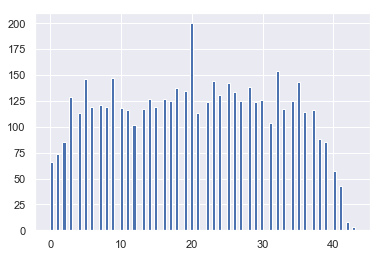

In [20]:
# To plot the histogram of the 'Experience' column after imputing
# We can observe the mean values imputed in the histogram

loan_data['Experience'].hist(stacked=False, bins=100)

# EDA 

### Column-wise unique values

In [21]:
loan_data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [22]:
loan_data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [23]:
loan_data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [24]:
loan_data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

#### All Binary columns seem to be taking values 0 and 1 as expected

In [25]:
loan_data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [26]:
loan_data['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

#### Education and Family have 3 and 4 classes respectively 

#### The number of Undergrads may be slightly more as can also be observed in the histogram above

#### However, the classes in both Education and Family columns are quite evenly spread

In [27]:
# The number of unique values of age of different customers

loan_data['Age'].nunique()

45

In [28]:
# the number of unique values of income

loan_data['Income'].nunique()

162

In [29]:
# The number of unique values for Experience years

loan_data['Experience'].nunique()

44

In [30]:
loan_data['Experience'].value_counts()

20    200
32    154
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
27    125
34    125
17    125
29    124
22    124
7     121
15    119
6     119
8     119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    102
38     88
39     85
2      85
1      74
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

#### Note, we imputed the approximate mean value of experience years for negative values incorrectly imputed

#### Therefore we have 44 unique Experience years values

In [31]:
loan_data['ZIP Code'].nunique()

467

In [32]:
loan_data['ZIP Code'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [33]:
loan_data[loan_data['ZIP Code'] > 90000].count()

Age                   4999
Experience            4999
Income                4999
ZIP Code              4999
Family                4999
CCAvg                 4999
Education             4999
Mortgage              4999
Personal Loan         4999
Securities Account    4999
CD Account            4999
Online                4999
CreditCard            4999
dtype: int64

#### The reason for carrying out the 3 methods abover are two fold:

#### 1. It shows that one of the Zip Codes have been entered as a 4 digit code

#### This has not been imputed because the ZIP Code may have a leading 0 

#### 2. It shows that the campaign was possibly carried out in a small area (all ZIP Codes start with 9)

In [34]:
loan_data['Mortgage'].nunique()

347

In [35]:
loan_data[loan_data['Mortgage'] == 0]['Mortgage'].count()

3462

#### We infer that there were 347 unique values of Mortgage

#### This seems to suggest a skewed data.

#### But 347 is almost as many as the number of people who accepted the Personal Loan option.

#### Hence, for now, we shall not drop this column and try to read into its contribution

#### However, 3462 of the total number of customers (5000) had Zero Mortgage

In [36]:
loan_data['CCAvg'].nunique()

108

In [37]:
loan_data[loan_data['CCAvg'] == 0]['CCAvg'].count()

106

#### A total of 106 people have Zero Credit Card spending on average per month

In [38]:
loan_data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

#### As observed previously our Target Variable 'Personal Loan' takes 2 values:

#### 0: Rejected Loan

#### 1: Accepted Loan

### Preparing Data Model

#### One thing to note here is that I wont be one-hot encoding Family members

#### Although, they are split into 4 classes, they represent an ordering of values

#### A value of 4 does suggest a larger number of family members than a value of 3 and so on

In [39]:
# Also replacing the categorical var with actual values

loan_data['Education'] = loan_data['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Professional'})
loan_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [40]:
# One-Hot encoding

loan_data = pd.get_dummies(loan_data, columns=['Education'])
loan_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0,0
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0,0


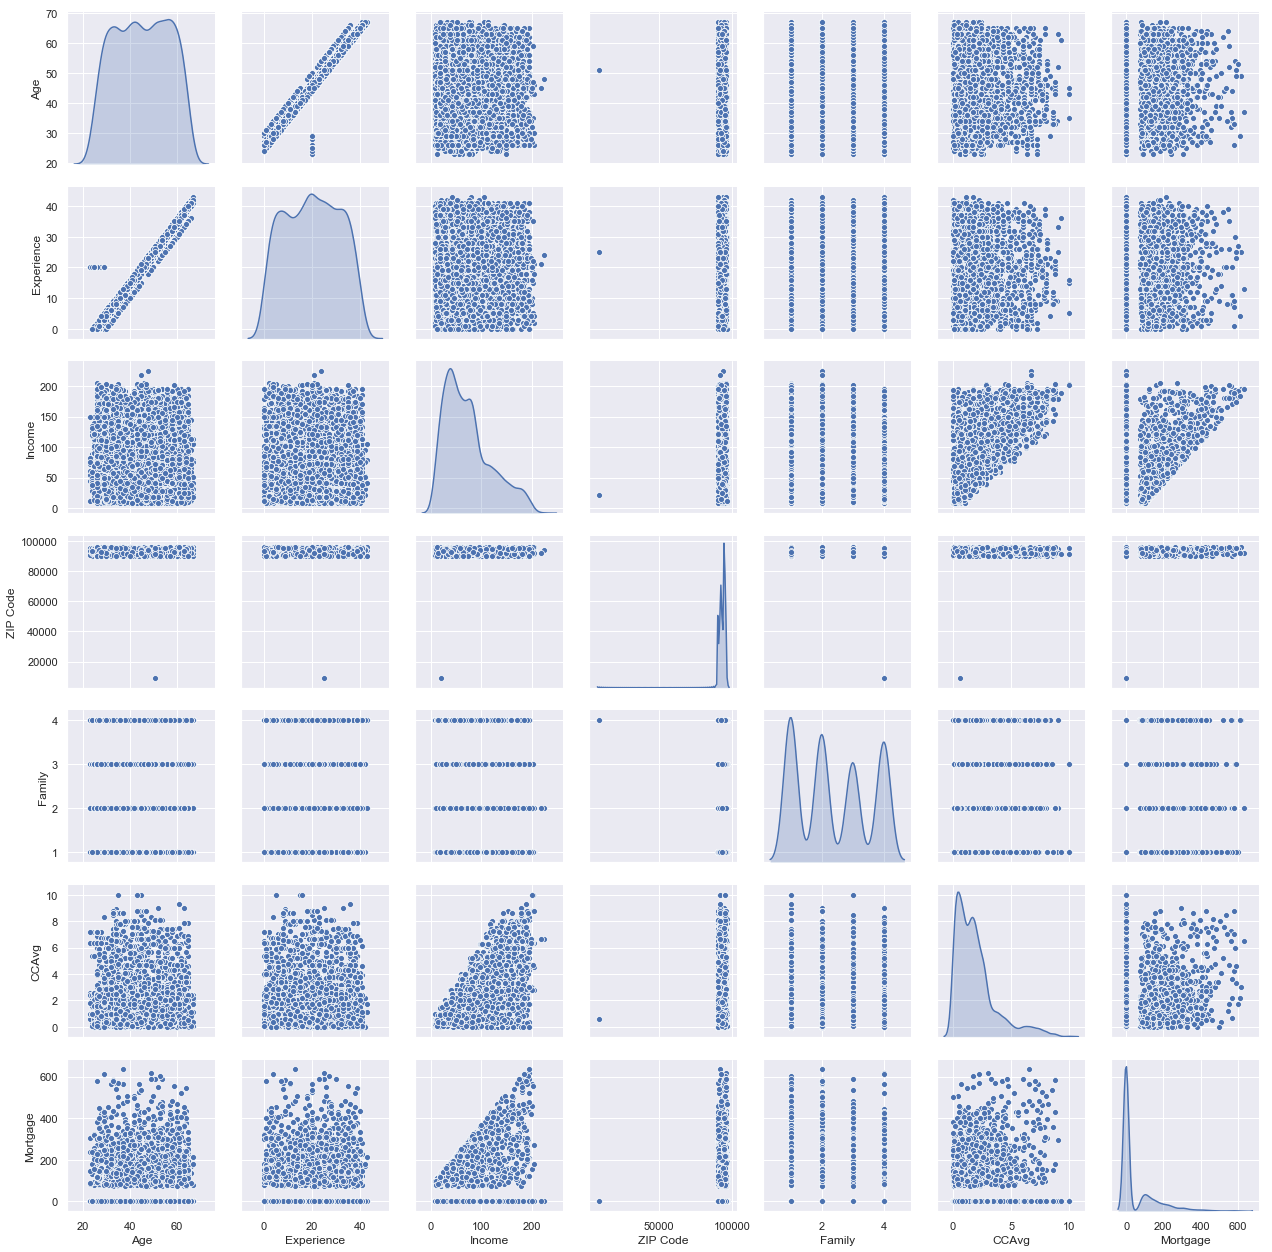

In [41]:
# Lets try to read into any relation betweeen the different columns through a Pair Plot

loan_data_attr = loan_data.iloc[:, 0:7]
sns.pairplot(loan_data_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

### The pair plot seems to suggest a lack of clear correlation between the attributes but for a few

### It would generally suggest that Experience increases with Age and hence high correlation.

### In our initial model we shall consider both Age and Experience attributes

### But in a latter model, only 1 or even neither attribute may be considered

In [42]:
# Lets look at the correlation between the different columns in numerical terms

loan_data_rel = loan_data.iloc[:, 0:8]
loan_data_rel.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan
Age,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539,-0.007726
Experience,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,-0.013365,-0.014013
Income,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,0.206806,0.502462
ZIP Code,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,0.007383,0.000107
Family,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,-0.020445,0.061367
CCAvg,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,0.109905,0.366889
Mortgage,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,1.000000,0.142095
Personal Loan,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.142095,1.000000


In [43]:
# However we want to see correlation in graphical representation so below is function for that

def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


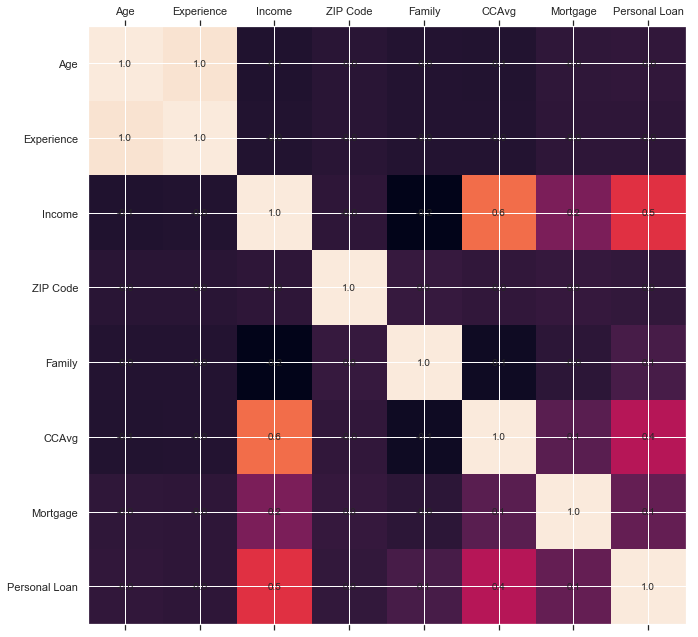

In [44]:
plot_corr(loan_data_rel)

### Age and Experience once again showing high correlation

# Train-Test Data Split

In [45]:
from sklearn.model_selection import train_test_split

X = loan_data.drop(['Personal Loan','Education_Graduate','ZIP Code'],axis=1)     # Predictor attribute columns (12 X m)
Y = loan_data['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=103)
# 103 - random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Professional,Education_Undergrad
2627,56,30,61,3,2.5,193,0,0,1,0,0,1
2084,36,9,44,4,1.0,101,1,0,1,0,0,0
3152,40,15,83,1,1.0,0,0,0,0,0,1,0
480,54,29,68,3,1.6,0,0,0,1,1,1,0
2225,54,24,25,4,0.4,115,0,0,0,0,1,0


#### Check of Split

In [46]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loan_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loan_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Initial Logistic regression Model

In [47]:
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

# Fit the model on train

model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

# predict on test

y_predict = model.predict(x_test)

# To print out the coefficients of the different attributes or independant variables
# This is to help us with the contribution of each attribute to the model

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.091642  0.092708  0.051248  0.404006  0.138111  0.000915 -0.590197   

          7         8         9       10        11  intercept  
0  3.012665 -0.562946 -1.053759 -0.19215 -3.774827  -5.207155  


### We can note over here that the coefficient of Mortgage is significantly low

### As we noted earlier, the Mortgage data was highly skewed, providing low variability

### This also seems to suggest that in a future model, Mortgage can be dropped

In [48]:
# a quick check on how the model performed on our training and test sets

model_score_train = model.score(x_train, y_train)
print('Training score: ', model_score_train)

model_score_test = model.score(x_test, y_test)
print('Test score: ', model_score_test)

Training score:  0.9617142857142857
Test score:  0.948


# The Training and Test Accuracy seem to suggest a well fit model

In [49]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# We shall look at variations of these parameters later

# Lets try to improve the model first based on existing observations

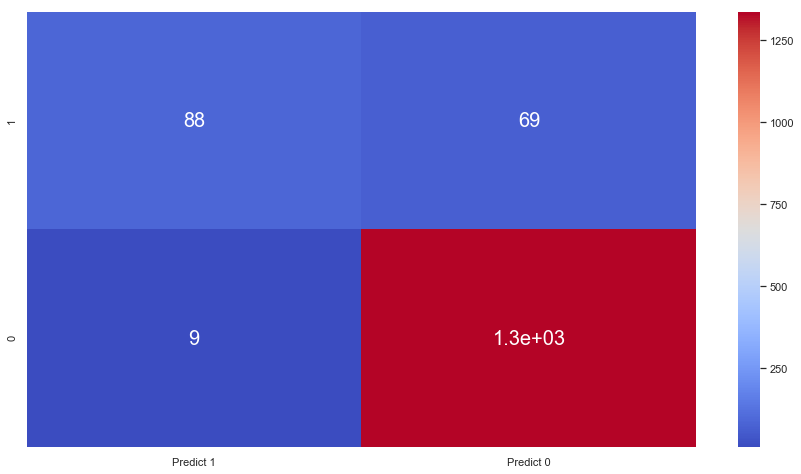

In [50]:
# Let's build a confusion matrix and visualise the same to read deeper into our model

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,8))
sns.heatmap(df_cm, annot=True, cmap='coolwarm', annot_kws={"size": 20})

The confusion matrix

True Positives (TP): we correctly predicted that they accepted the Personal Loan 88

True Negatives (TN): we correctly predicted that they did not accept 1303

False Positives (FP): we incorrectly predicted that they accepted the Personl Loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they did not accept the Personal Loan (a "Type II error") 69 Falsely predict negative Type II error

### Some stats/metrics that can be derived

In [51]:
# Lets look at the metrics obtained for our model

from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve

print('Recall Score: ', recall_score(y_test, y_predict))

print('Precision Score: ', precision_score(y_test, y_predict))

print('F1 score: ', f1_score(y_test, y_predict))

print('ROC AUC Score: ', roc_auc_score(y_test, y_predict))

Recall Score:  0.5605095541401274
Precision Score:  0.9072164948453608
F1 score:  0.6929133858267716
ROC AUC Score:  0.7769040696985074


### Let's observe the model for various values of threshold through the ROC

Text(0.5, 1.0, 'ROC')

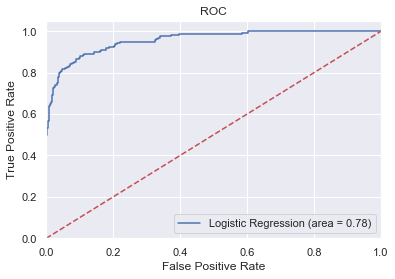

In [52]:
# y_prob is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

y_prob = model.predict_proba(x_test) 

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

plt.figure()

plt.plot(fpr, tpr, label= 'Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_predict))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0, 1])

plt.ylim([0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.title('ROC')

# This seems to suggest a lower optimal value of Threshold

__Precision = 88 / (88 + 9) = 90.72%__

__Recall = 88 / (88 + 69) = 56.06%__

## The reason for stressing on these 2 metrics:

### The model seems to have failed to pick up a decent number of people who opted for a Personal Loan

### The number of False Negatives clearly illustrates this

### Lets therefore look at some of the stats in detail

In [53]:
# reading through the major stats

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.91      0.56      0.69       157

    accuracy                           0.95      1500
   macro avg       0.93      0.78      0.83      1500
weighted avg       0.95      0.95      0.94      1500



### Remember we ideally need a higher value of Recall

### One solution to this model without affecting the attributes used would be to adjust the THRESHOLD

### Therefore, lets observe how the precision, recall and threshold vary

(0, 1)

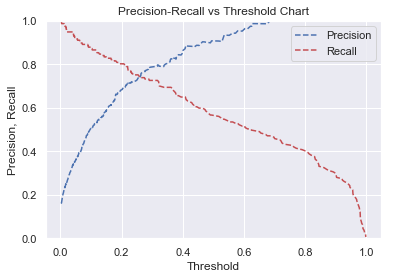

In [54]:
from sklearn.metrics import precision_recall_curve

# retrieve probability of being 1(in second column of y_prob)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1]) 


pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label= "Precision")
plt.plot(thresholds, recall[: -1], "r--", label= "Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend()
plt.ylim([0,1])

### The curve above focusses on the Precision and Recall with varying threshold

### when considering it for predicting acceptance of Personal Loan

## If indeed the Bank is looking at predicting a larger percentage

## of people who accepted a Personal Loan correctly

## and is therefore looking for a Higher Recall, we can lower

## the threshold value.

### But lets also try to build a model with changes made to some of the

### attributes based on our previous observations

In [55]:
# Let's drop Age, Experience and Mortgage attributes based on our observations along the way

X2 = loan_data.drop(['Personal Loan','Education_Graduate','ZIP Code', 'Age', 'Experience', 'Mortgage'],axis=1)     # Predictor attribute columns (9 X m)
Y2 = loan_data['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X2, Y2, test_size=0.3, random_state=103)
# 103 - random seed number

x_train_2.head()

,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_Professional,Education_Undergrad
2627,61,3,2.5,0,0,1,0,0,1
2084,44,4,1.0,1,0,1,0,0,0
3152,83,1,1.0,0,0,0,0,1,0
480,68,3,1.6,0,0,1,1,1,0
2225,25,4,0.4,0,0,0,0,1,0


In [56]:
# Fit the model on train

model2 = LogisticRegression(solver="liblinear")
model2.fit(x_train_2, y_train_2)

#predict on test

y_predict_2 = model2.predict(x_test_2)

# To print out the coefficients of the different attributes or independant variables
# This is to help us with the contribution of each attribute to the model

coef_df = pd.DataFrame(model2.coef_)
coef_df['intercept'] = model2.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.049745  0.362545  0.127641 -0.600418  2.967844 -0.578951 -1.042155   

          7         8  intercept  
0 -0.212289 -3.666556  -7.077272  


In [57]:
# a quick check on how the model performed on our training and test sets

model_score_train_2 = model2.score(x_train_2, y_train_2)
print('Training score: ', model_score_train_2)

model_score_test_2 = model2.score(x_test_2, y_test_2)
print('Test score: ', model_score_test_2)

Training score:  0.9634285714285714
Test score:  0.9513333333333334


## As in our previous model, we observe a well fit model

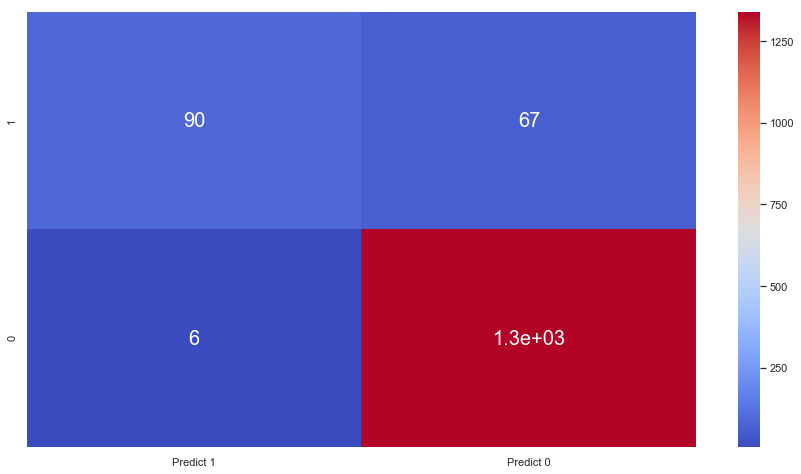

In [58]:
# Let's build a confusion matrix and visualise the same to read deeper into our model

cm = metrics.confusion_matrix(y_test_2, y_predict_2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,8))
sns.heatmap(df_cm, annot=True, cmap='coolwarm', annot_kws={"size": 20})

The confusion matrix

True Positives (TP): we correctly predicted that they accepted the Personal Loan 90

True Negatives (TN): we correctly predicted that they did not accept 1303

False Positives (FP): we incorrectly predicted that they accepted the Personl Loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they did not accept the Personal Loan (a "Type II error") 67 Falsely predict negative Type II error

# We can observe a small increase in the TP and corresponding decrease in FN which should result in a partially improved score for all metrics

# Also, not only have we improved the model performance (although little), the number of independant attributes or columns have also been reduced

## Stats/ Metrics

In [59]:
# Lets look at the metrics obtained for our model

from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve

print('Recall Score: ', recall_score(y_test_2, y_predict_2))

print('Precision Score: ', precision_score(y_test_2, y_predict_2))

print('F1 score: ', f1_score(y_test_2, y_predict_2))

print('ROC AUC Score: ', roc_auc_score(y_test_2, y_predict_2))

Recall Score:  0.5732484076433121
Precision Score:  0.9375
F1 score:  0.7114624505928854
ROC AUC Score:  0.7843903989072851


#### Lets have a closer look at the stats again

In [60]:
# reading through the major stats

print(classification_report(y_test_2, y_predict_2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1343
           1       0.94      0.57      0.71       157

    accuracy                           0.95      1500
   macro avg       0.94      0.78      0.84      1500
weighted avg       0.95      0.95      0.95      1500



# Yet again, we can observe the improvement in the model (although minimial) particularly among people who decided to buy a Personal Loan

Text(0.5, 1.0, 'ROC')

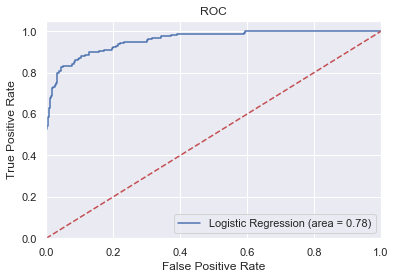

In [61]:
# y_prob is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

y_prob_2 = model2.predict_proba(x_test_2) 

fpr2, tpr2, thresholds2 = roc_curve(y_test_2, y_prob_2[:,1])

plt.figure()

plt.plot(fpr2, tpr2, label= 'Logistic Regression (area = %0.2f)' % roc_auc_score(y_test_2, y_predict_2))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0, 1])

plt.ylim([0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.title('ROC')

(0, 1)

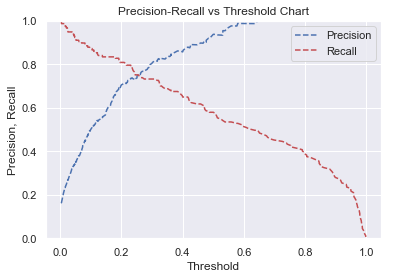

In [62]:
from sklearn.metrics import precision_recall_curve

# retrieve probability of being 1(in second column of y_prob)

precision2, recall2, thresholds2 = precision_recall_curve(y_test_2, y_prob_2[:,1]) 


pr_auc_2 = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds2, precision2[: -1], "b--", label= "Precision")
plt.plot(thresholds2, recall2[: -1], "r--", label= "Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend()
plt.ylim([0,1])

# We had concluded earlier that if the bank was looking to lower the threshold and convince people with lower possibility of buying a Perosnal Loan, then the recall could be improved 

# With the most recent model, that threshold can be a little higher while also reducing the number of independant attributes the model includes

# But one observation that I would like to take note of, relates to the ZIP codes. We have not included ZIP codes in our model and rightly so for the data we were provided.

# However, I personally feel that the restricted set of ZIP codes need to be read into, for the broader picture

# Let's now look at what we can improve through the parameters

In [65]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score = []
test_score = []

solver = ['newton-cg','lbfgs','liblinear','sag','saga']

for i in solver:
    model3 = LogisticRegression(random_state = 103, penalty='l2', C = 0.75, solver=i)  # changing values of solver
    model3.fit(x_train_2, y_train_2) 
    y_predict_2 = model3.predict(x_test_2)     
    train_score.append(round(model3.score(x_train_2, y_train_2),3))
    test_score.append(round(model3.score(x_test_2, y_test_2),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.964, 0.965, 0.964, 0.923, 0.914]

[0.951, 0.951, 0.949, 0.917, 0.907]


In [66]:
train_score=[]
test_score=[]

solver = ['liblinear','saga']   # changing values of solver which works with 'l1'

for i in solver:
    model3 = LogisticRegression(random_state = 103,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model3.fit(x_train_2, y_train_2) 
    y_predict_2 = model3.predict(x_test_2)     
    train_score.append(round(model3.score(x_train_2, y_train_2),3))
    test_score.append(round(model3.score(x_test_2, y_test_2),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.965, 0.914]

[0.951, 0.907]


### We observe the highest accuracy with l2 for lbfgs and l1 for liblinear
### Since we started with liblinear, I'll be working with liblinear

In [67]:
model3 = LogisticRegression(random_state = 103, penalty='l1', solver='liblinear', class_weight = 'balanced') # changing class weight to balanced

model3.fit(x_train_2, y_train_2) 

y_predict_2 = model3.predict(x_test_2)     

print("Training accuracy",model3.score(x_train_2,y_train_2))  
print()
print("Testing accuracy",model3.score(x_test_2, y_test_2))

Training accuracy 0.9054285714285715

Testing accuracy 0.9053333333333333


### Clearly there is a drop in accuracy here and therefore we shall not add the class weight to the model

### The same was also checked with l2 for lbfgs and there was a similar drop in accuracy

In [68]:
# Running a loop to check different values of 'C'

train_score = []                                 
test_score = []

C = [0.01,0.1,0.25,0.5,0.75,1]

for i in C:
    model3 = LogisticRegression(random_state = 103, penalty='l1', solver='liblinear', C=i)  # changing values of C
    model3.fit(x_train_2, y_train_2)
    
    y_predict_2 = model3.predict(x_test_2)
    
    train_score.append(round(model3.score(x_train_2,y_train_2),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model3.score(x_test_2, y_test_2),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.927, 0.961, 0.966, 0.966, 0.965, 0.965]

[0.911, 0.947, 0.949, 0.952, 0.951, 0.951]


### Both Training and Testing scores or accuracies are marginally higher for C = 0.5

In [69]:
# Therefore the final model for the default Threshold is:

model3 = LogisticRegression(random_state = 103, penalty='l1', solver='liblinear', C=0.5) 
model3.fit(x_train_2, y_train_2)

y_predict_2 = model3.predict(x_test_2)

print("Training accuracy",model3.score(x_train_2, y_train_2))  
print()
print("Testing accuracy",model3.score(x_test_2, y_test_2))
print()

print("Recall:",recall_score(y_test_2, y_predict_2))
print()
print("Precision:",precision_score(y_test_2, y_predict_2))
print()
print("F1 Score:",f1_score(y_test_2, y_predict_2))
print()
print("Roc Auc Score:",roc_auc_score(y_test_2, y_predict_2))

Training accuracy 0.9657142857142857

Testing accuracy 0.952

Recall: 0.5859872611464968

Precision: 0.9292929292929293

F1 Score: 0.7187499999999999

Roc Auc Score: 0.7903875248398157


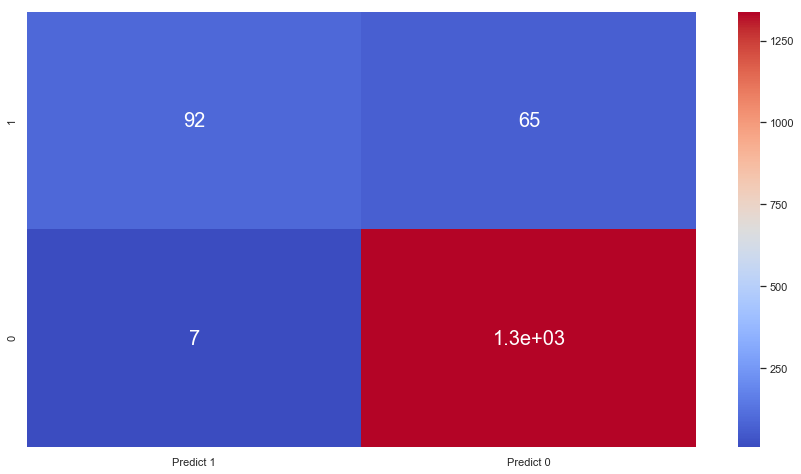

In [70]:
# Let's build a confusion matrix and visualise the same to read deeper into our model

cm = metrics.confusion_matrix(y_test_2, y_predict_2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,8))
sns.heatmap(df_cm, annot=True, cmap='coolwarm', annot_kws={"size": 20})

# We observe that our final model provides us with the best Accuracy

# While all metrics but for precision have improved, we notice significantly

# An improvement in the Recall and F1-score

# Finally lets look at the same model with a lower threshold

# We had noted that we were expecting a better recall with lower threshold

In [71]:
# The final model with a lower threshold

model3 = LogisticRegression(random_state = 103, penalty='l1', solver='liblinear', C=0.5) 
model3.fit(x_train_2, y_train_2)

threshold = 0.26

y_predict_2 = np.where(model3.predict_proba(x_test_2)[:, 1] > threshold, 1, 0)

print("Training accuracy",model3.score(x_train_2, y_train_2))  
print()
print("Testing accuracy",model3.score(x_test_2, y_test_2))
print()

print("Recall:",recall_score(y_test_2, y_predict_2))
print()
print("Precision:",precision_score(y_test_2, y_predict_2))
print()
print("F1 Score:",f1_score(y_test_2, y_predict_2))
print()
print("ROC AUC Score:",roc_auc_score(y_test_2, y_predict_2))

Training accuracy 0.9657142857142857

Testing accuracy 0.952

Recall: 0.7643312101910829

Precision: 0.7643312101910829

F1 Score: 0.7643312101910829

ROC AUC Score: 0.8683904747902548


# We find an improved Recall, F1-score and ROC AUC score

# which are the primary metrics of interest in our case after comparing

# with different values of threshold based on the previous 

# ROC curve and Precision-Recall curve

# Let's now try the same after applying class weights to the model

In [72]:
# Check with class weight applied to the model

model3 = LogisticRegression(random_state = 103, penalty='l1', solver='liblinear', C=0.5, class_weight= 'balanced') 
model3.fit(x_train_2, y_train_2)

threshold = 0.26

y_predict_2 = np.where(model3.predict_proba(x_test_2)[:, 1] > threshold, 1, 0)

print("Training accuracy",model3.score(x_train_2, y_train_2))  
print()
print("Testing accuracy",model3.score(x_test_2, y_test_2))
print()

print("Recall:",recall_score(y_test_2, y_predict_2))
print()
print("Precision:",precision_score(y_test_2, y_predict_2))
print()
print("F1 Score:",f1_score(y_test_2, y_predict_2))
print()
print("Roc Auc Score:",roc_auc_score(y_test_2, y_predict_2))

Training accuracy 0.9051428571428571

Testing accuracy 0.9073333333333333

Recall: 0.9617834394904459

Precision: 0.352803738317757

F1 Score: 0.5162393162393163

Roc Auc Score: 0.8777643928651038


# Clearly the results are not encouraging

# The trade-off between the different metrics is too significant

# The drop in Precision particularly is too large

In [73]:
# The final model with a lower threshold

model3 = LogisticRegression(random_state = 103, penalty='l1', solver='liblinear', C=0.5) 
model3.fit(x_train_2, y_train_2)

threshold = 0.26

y_predict_2 = np.where(model3.predict_proba(x_test_2)[:, 1] > threshold, 1, 0)

print("Training accuracy",model3.score(x_train_2, y_train_2))  
print()
print("Testing accuracy",model3.score(x_test_2, y_test_2))
print()

print("Recall:",recall_score(y_test_2, y_predict_2))
print()
print("Precision:",precision_score(y_test_2, y_predict_2))
print()
print("F1 Score:",f1_score(y_test_2, y_predict_2))
print()
print("ROC AUC Score:",roc_auc_score(y_test_2, y_predict_2))

Training accuracy 0.9657142857142857

Testing accuracy 0.952

Recall: 0.7643312101910829

Precision: 0.7643312101910829

F1 Score: 0.7643312101910829

ROC AUC Score: 0.8683904747902548


# Therefore, let's now focus on the model above and derive its

# Confusion Matrix

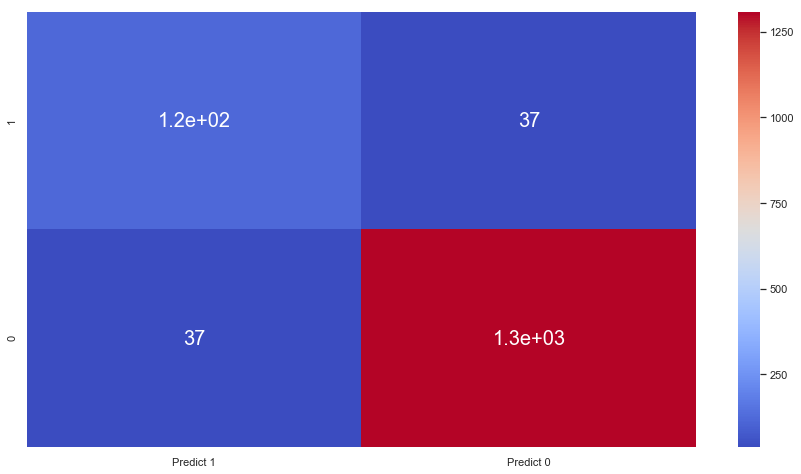

In [74]:
# Let's build a confusion matrix and visualise the same to read deeper into our model

cm = metrics.confusion_matrix(y_test_2, y_predict_2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,8))
sns.heatmap(df_cm, annot=True, cmap='coolwarm', annot_kws={"size": 20})

# Business Insights

__Based on the confusion matrix for the model above:__

True Positives (TP): we correctly predicted that they accepted the Personal Loan __120__

True Negatives (TN): we correctly predicted that they did not accept __1300__

False Positives (FP): we incorrectly predicted that they accepted the Personl Loan (a "Type I error") __37__ Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they did not accept the Personal Loan (a "Type II error") __37__ Falsely predict negative Type II error

Liability customers as the name suggests cost banks in the long run and in essence leave banks with a debt to pay.

Here, I would like to assume that the bank would want to give a Personal Loan to as many of its liability customers likely to buy a Personal loan, referring to fewer number of False Negatives. If the False negatives are high, this would result in lost opportunities for the bank to convert its liability customers into those buying Personal Loans and therefore lesser profit. Hence Recall becomes an important metric.

Although the conversion rate from the previous campaign was considered a success, 9.6% of the total customers statistically is still a small proportion of the total data set. Hence, a standard logistic regression model is likely to result in more False negatives for an unbiased/balanced threshold of 0.5 as can be observed in the first two confusion matrices. Hence, we look at a model biased towards accepting liability customers with a lower probability of buying a Personal Loan. 

After achieving the desired metrics we can deploy the model for practical use. The bank can now look to carry out marketing campaigns and other strategies to liability customers who have an encouraging chance of purchasing a Personal Loan. They can use the model for upcoming customers.

__Note:__ 

1. The threshold presently selected looks to maintain decent results in all metrics 

There is a clear mention that the bank would like to increase the success ratio with a __minimal budget__. A really low Precision score would suggest a large number of False Positives. This would point to wasted resources on a large number of customers who would not buy a Personal Loan. Hence, we use the F1 score as well to strike the right balance.

2. An observation which may or may not be significant in the grand scheme of things relates to the ZIP code

We can observe from the ZIP codes listed that most customers are from similar locations geographically (All are 5 digit ZIP codes starting with the digit 9). If indeed the bank is looking to expand and read into customer patterns on a larger scale, the model may not be applicable to other regions.

3. Finally, all sources of liability for the bank through customers may not have been listed

The main sources of liability listed in the data set are CD account and Securities account. These are not in general the only sources of liability for a bank and the role that some other sources of liability among the customers listed may have played in convincing them to purchase a Personal Loan may be worth having a look at 